## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
encoded-data.csv	selected_columns_all.csv  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns.csv	  UNSW-NB15_2.csv
OTset.csv		selected_columns_dos.csv  UNSW-NB15_3.csv
preprocessing.csv	SVR-predict-data.csv	  UNSW-NB15_4.csv
preprosessing-dos.csv	testset.csv


## **Load balanced training datset for DOS attacks**

Data = (x_train, y_train)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col['DoS'])
col = ['dttl','state','sttl','proto','swin','ct_dst_sport_ltm','srcip', 'dstip','smeansz','sbytes','Sload','ct_state_ttl','dsport','sport','ct_dst_ltm']

#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df['DoS'] == 1]
Normal_Data = df[df['Label'] == 0]
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[['DoS']]
X.head()

undersample = RandomUnderSampler(random_state=0)
# fit and apply the transform
X, Y = undersample.fit_resample(X,Y)


x_train,y_train  = shuffle(X[col],Y)


X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




array([[0.00000000e+00, 3.75000000e-08, 1.58750000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 1.25000000e-08],
       [0.00000000e+00, 2.25000009e-08, 9.52500038e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.12500004e-08],
       [2.25597563e-06, 3.88961315e-07, 2.41156015e-06, ...,
        2.87831373e-06, 2.07381726e-02, 1.55584526e-07],
       ...,
       [8.48783300e-05, 1.46341948e-05, 9.07320079e-05, ...,
        2.66980397e-01, 2.90965842e-01, 5.85367793e-06],
       [7.00459188e-05, 1.20768826e-05, 7.48766719e-05, ...,
        3.52031465e-01, 3.71207139e-01, 4.83075302e-06],
       [1.16976951e-03, 2.32097124e-05, 2.87800434e-04, ...,
        5.94168639e-04, 9.99410218e-01, 4.64194249e-06]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [58]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns=list(select_col['DoS'])
col = ['dttl','state','sttl','proto','swin','ct_dst_sport_ltm','srcip', 'dstip','smeansz','sbytes','Sload','ct_state_ttl','dsport','sport','ct_dst_ltm']
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 

DoS_attacks = test_data[test_data['attack_cat'] == 'DoS']
# print(DoS_attacks.shape)
Normal_Data = test_data[test_data['Label'] == 0]
# print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=['attack_cat', 'Label'], axis=1)
Y=result[['Label']]
X.head()

x_test,y_test  = shuffle(X[col],Y)

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
# print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
x_test['state'] = labelencoder.fit_transform(x_test['state'])

X_test_DoS_normalized = preprocessing.normalize(x_test) 


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Random Forrest Regression**

In [45]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#training data
x = np.array(X_train_DoS_normalized)
y = np.array(y_train)


# Number of trees in random forest
n_estimators = [2, 4, 8, 16, 32, 64, 100]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}




 # create regressor object
regressor = GridSearchCV(RandomForestRegressor(random_state=0),param_grid,return_train_score=False)

# fit the regressor with x and y data
regressor.fit(x, y)


df = pd.DataFrame(regressor.cv_results_)
df

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038511,0.002563,0.006175,0.010262,True,2,auto,1,2,2,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.910400,0.917024,0.897618,0.912294,0.922084,0.911884,0.008202,117
1,0.071712,0.002553,0.001250,0.000035,True,2,auto,1,2,4,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.910845,0.917010,0.897132,0.912081,0.922038,0.911821,0.008344,121
2,0.144950,0.004617,0.001893,0.000121,True,2,auto,1,2,8,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.911824,0.917176,0.897856,0.911481,0.922012,0.912070,0.008091,113
3,0.288686,0.001852,0.002900,0.000100,True,2,auto,1,2,16,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.913144,0.916967,0.898190,0.911452,0.922343,0.912419,0.008039,105
4,0.566160,0.003892,0.005117,0.000325,True,2,auto,1,2,32,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.912903,0.917191,0.898401,0.911358,0.922172,0.912405,0.007947,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.092173,0.004910,0.002068,0.000144,False,4,sqrt,2,5,8,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.921841,0.915579,0.915243,0.922182,0.925686,0.920106,0.004064,69
220,0.181956,0.004375,0.003530,0.000194,False,4,sqrt,2,5,16,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.915807,0.915801,0.908440,0.917397,0.920439,0.915577,0.003949,85
221,0.357999,0.005682,0.006819,0.001459,False,4,sqrt,2,5,32,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.916808,0.911281,0.904633,0.920328,0.920142,0.914638,0.005979,91
222,0.712709,0.007940,0.012339,0.000558,False,4,sqrt,2,5,64,"{'bootstrap': False, 'max_depth': 4, 'max_feat...",0.915171,0.911899,0.906526,0.916700,0.917357,0.913531,0.003977,93


In [46]:
df[['param_bootstrap', 	'param_max_depth', 	'param_max_features', 	'param_min_samples_leaf', 	'param_min_samples_split', 	'param_n_estimators','mean_test_score']]

,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,True,2,auto,1,2,2,0.911884
1,True,2,auto,1,2,4,0.911821
2,True,2,auto,1,2,8,0.912070
3,True,2,auto,1,2,16,0.912419
4,True,2,auto,1,2,32,0.912405
...,...,...,...,...,...,...,...
219,False,4,sqrt,2,5,8,0.920106
220,False,4,sqrt,2,5,16,0.915577
221,False,4,sqrt,2,5,32,0.914638
222,False,4,sqrt,2,5,64,0.913531


In [47]:
regressor.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

**Train the model**

In [48]:
from sklearn.ensemble import RandomForestRegressor

#training data
x = np.array(X_train_DoS_normalized)
y = np.array(y_train)


 # create regressor object
regressor = RandomForestRegressor(bootstrap=True,max_depth=4,max_features= 'auto',min_samples_leaf=2,min_samples_split=2,n_estimators=100)

# fit the regressor with x and y data
regressor.fit(x, y)

y_pred = regressor.predict(x)


<ipython-input-48-9d36a4fb388b>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x, y)


In [49]:
from sklearn.metrics import accuracy_score

for i in range(1,100):
  y_predict_class = [1 if p > i/100 else 0 for p in y_pred]
  print("Accuracy when threshould = ",i/100, round(accuracy_score(y, y_predict_class), 6))

Accuracy when threshould =  0.01 0.503445
Accuracy when threshould =  0.02 0.938965
Accuracy when threshould =  0.03 0.939223
Accuracy when threshould =  0.04 0.939223
Accuracy when threshould =  0.05 0.939428
Accuracy when threshould =  0.06 0.939428
Accuracy when threshould =  0.07 0.940457
Accuracy when threshould =  0.08 0.940457
Accuracy when threshould =  0.09 0.940662
Accuracy when threshould =  0.1 0.98262
Accuracy when threshould =  0.11 0.982723
Accuracy when threshould =  0.12 0.982877
Accuracy when threshould =  0.13 0.982877
Accuracy when threshould =  0.14 0.982877
Accuracy when threshould =  0.15 0.982877
Accuracy when threshould =  0.16 0.982877
Accuracy when threshould =  0.17 0.983083
Accuracy when threshould =  0.18 0.983083
Accuracy when threshould =  0.19 0.983083
Accuracy when threshould =  0.2 0.983083
Accuracy when threshould =  0.21 0.983135
Accuracy when threshould =  0.22 0.983135
Accuracy when threshould =  0.23 0.983186
Accuracy when threshould =  0.24 0.98

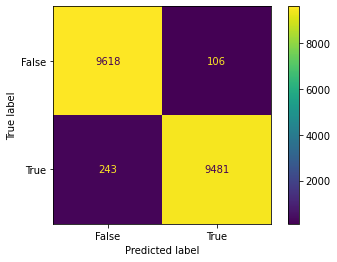

In [50]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

threshould =0.7

y_predict_class = [1 if p > threshould else 0 for p in y_pred]
confusion_matrix = metrics.confusion_matrix(y, y_predict_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 


**Test Set Accuracy**

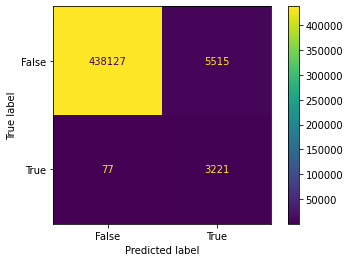

Accuracy when threshould =  0.6 0.987488


In [59]:
x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)
y_pred_test_set = regressor.predict(x_test_array)


threshould =0.6


y_predict_test_set_class = [1 if p > threshould else 0 for p in y_pred_test_set]
confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_test_set_class)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

print("Accuracy when threshould = ",threshould, round(accuracy_score(y_test_array, y_predict_test_set_class), 6))